In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from random import random, randint
from copy import deepcopy
from time import time
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
filename = "/content/gdrive/My Drive/Colab Notebooks/income.csv"

In [5]:
data = pd.read_csv(filename)

In [ ]:
data.shape

(25000, 15)

In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


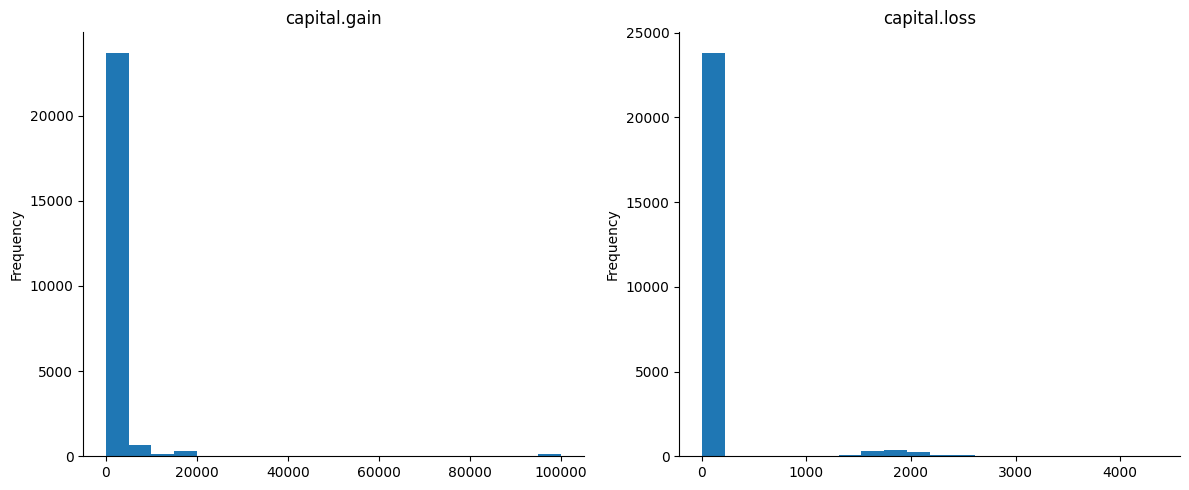

In [ ]:
# @title capital.gain

from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
data['capital.gain'].plot(kind='hist', bins=20, title='capital.gain', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

# Plot the second histogram on the second subplot
data['capital.loss'].plot(kind='hist', bins=20, title='capital.loss', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
q = data["capital.gain"].quantile(0.9999)
data[data["capital.gain"] < q]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


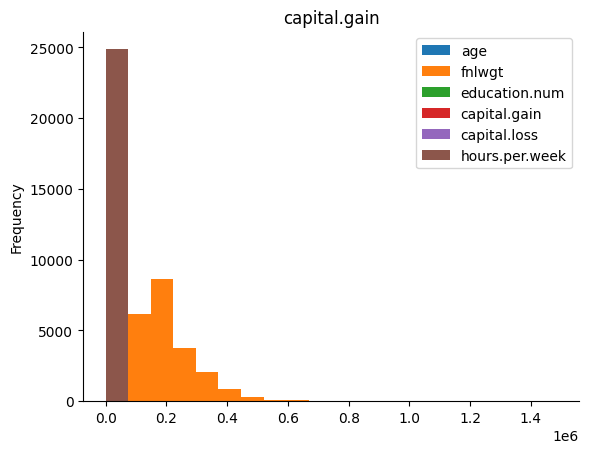

In [ ]:
q = data["capital.gain"].quantile(0.9999)
data[data["capital.gain"] < q].plot(kind='hist', bins=20, title='capital.gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("Mean: "+ str(data["capital.gain"].mean()))

print("Std: "+ str(data["capital.gain"].std()))

Mean: 1083.14404
Std: 7321.971568259352


In [ ]:
fig = px.box(data, y="capital.gain")

fig.show()

In [ ]:
(data["capital.gain"]==0).sum()

22888

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.10)

   q3=df.quantile(0.90)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(data["capital.gain"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 2112
max outlier value: 99999
min outlier value: 114


0        99999
29        3781
42        7298
57        6514
103       7298
         ...  
24910     4865
24916    10520
24944    14084
24950     3908
24994     3432
Name: capital.gain, Length: 2112, dtype: int64